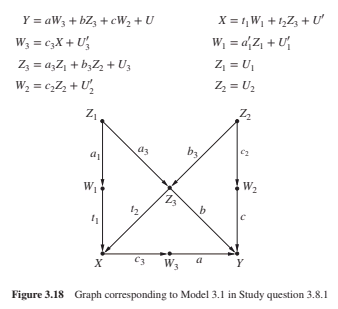

In [3]:
import numpy as np
import random

a=random.random()
b=random.random()
c=random.random()
t1=random.random()
t2=random.random()
c3=random.random()
a1_prime=random.random()
a3=random.random()
b3=random.random()
c2=random.random()

def gen_data(
    U_sd=1,
    U1_sd=1,
    U2_sd=1,
    U3_sd=1,
    U_prime_sd=1,
    U1_prime_sd=1,
    U2_prime_sd=1,
    U3_prime_sd=1,
    N=100000,
    a=a,
    b=b,
    c=c,
    t1=t1,
    t2=t2,
    c3=c3,
    a1_prime=a1_prime,
    a3=a3,
    b3=b3,
    c2=c2,
):
    U =  np.random.normal(0, U_sd, N)
    U1 = np.random.normal(0, U1_sd, N)
    U2 = np.random.normal(0, U2_sd, N)
    U3 = np.random.normal(0, U3_sd, N)
    U_prime = np.random.normal(0, U_prime_sd, N)
    U1_prime = np.random.normal(0, U1_prime_sd, N)
    U2_prime = np.random.normal(0, U2_prime_sd, N)
    U3_prime = np.random.normal(0, U3_prime_sd, N)
    Z1 = U1
    Z2 = U2
    W1 = a1_prime * Z1 + U1_prime
    Z3 = a3 * Z1 + b3 * Z2 + U3
    X = t1 * W1 + t2 * Z3 + U_prime
    W3 = c3 * X + U3_prime
    W2 = c2 * Z2 + U2_prime
    Y = a * W3 + b * Z3 + c * W2 + U
    return {
        'Z1': Z1,
        'Z2': Z2,
        'W1': W1,
        'Z3': Z3,
        'X': X,
        'W3': W3,
        'W2': W2,
        'Y': Y,
    }

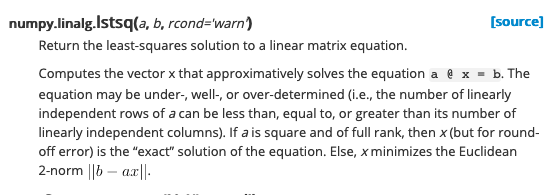

Goal: regress the following:
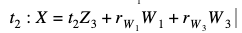

In [4]:
def regress(vars, target, sample):
    target_data = sample[target]
    data = np.zeros([len(vars), target_data.shape[0]])
    for i, var in enumerate(vars):
        data[i] = sample[var]
    return np.linalg.lstsq(data.T, sample[target])[0]

In [5]:
sample = gen_data()
print(regress(['W1'], 'Z1', sample=sample), a1_prime)

print("rxia's answer:")
print(regress(['Z3', 'W1', 'W3'], 'X', sample=sample)[0], t2)

print("regress on scm:")
print(regress(['W1', 'Z3'], 'X', sample=sample)[1], t2)

[0.23139252] 0.2457258505415305
rxia's answer:
0.06506619554739428 0.07347509890290349
regress on scm:
0.07258959880732618 0.07347509890290349


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


In [37]:
regress(['Z3', 'W1', 'W3'], 'X', sample=sample)

<ipython-input-31-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


array([0.41773073, 0.1684202 , 0.46303674])

In [38]:
regress(['Z2', 'W2'], 'W1', sample=sample)

<ipython-input-31-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


array([ 0.00538223, -0.00134624])

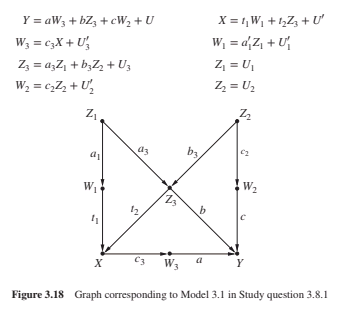

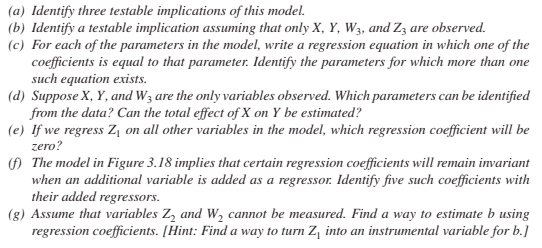

**(a)** (1) Regressing any combination of $\{Z_1, W_1, X\}$ against $\{Z_2, W_2\}$ should yield zero regression (or very small) coefficients. (2) Regressing $Y$ against $X, Z_3, W_3$ should yield a zero regression coefficient for X since $Z_3$ and $W_3$ block all paths from $X$ to $Y$. (3) Regressing $Y$ against $Z_2, Z_3 and W_3$ should have regression coefficient $c_2\cdot c$ for $Z_2$.

In [10]:
print("The following numbers should be small for (1):")
print(regress(['Z1', 'W1', 'X'], 'Z2', sample=sample))
print(regress(['Z1', 'W1', 'X'], 'W2', sample=sample))
print("The following number should be small for (2):")
print(regress(['X', 'Z3', 'W3'], 'Y', sample=sample)[0])
print("The following numbers should be close to each other for (3):")
print(regress(['Z2', 'Z3', 'W3'], 'Y', sample=sample)[0], c * c2)

The following numbers should be small for (1):
[-0.00290278 -0.00375454  0.03376776]
[-0.00381077 -0.00184847  0.00297328]
The following number should be small for (2):
-0.0035682349777569657
The following numbers should be close to each other for (3):
0.0806471780163379 0.08138627515478915


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


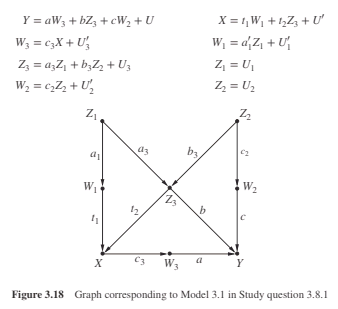

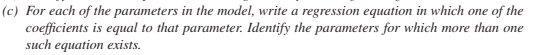

**(b)** See (2) from part (a).

**(c)** Any of the equations from the structural equations should yield the right regression coefficients. Any subset of these variables can be replaced by another set of variables that blocks paths from the remaining variables to the subset that was replaced, as in (2).

In [13]:
# print("Y: ", regress(["W3", "Z3", "W2"], "Y", sample=sample), [a, b, c])
print("W3: ", regress(["X"], "W3", sample=sample), [c3])
print("Z3: ", regress(["Z1", "Z2"], "Z3", sample=sample), [a3, b3])
print("W2: ", regress(["Z2"], "W2", sample=sample), [c2])
print("X: ", regress(["W1", "Z3"], "X", sample=sample), [t1, t2])
print("W1: ", regress(["Z1"], "W1", sample=sample), [a1_prime])

W3:  [0.34640407] [0.3434723988399465]
Z3:  [0.52778681 0.41417587] [0.5263929903519121, 0.41464606207097976]
W2:  [0.10661973] [0.1056785759768828]
X:  [0.06393992 0.0725896 ] [0.06028747453969763, 0.07347509890290349]
W1:  [0.24788113] [0.2457258505415305]


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


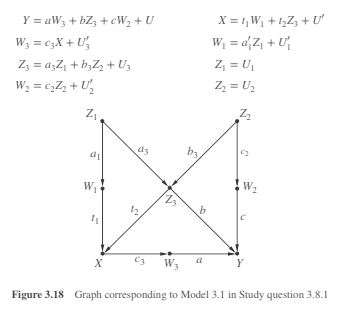
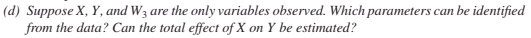
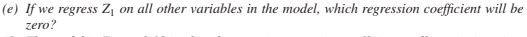

**(d)** $c_3$ and $a$ can be found by regressing $W3$ against $X$ and $Y$ against $W_3$. The total effect of $X$ on $Y$ can be estimated as $c_3 \cdot a$. This works because $Y$ is a collider in every path from $X$ to $Y$.

**(e)** All parameters other than the coefficients on $W_1$, $Z_3$ and $Z_2$.

In [27]:
# (d) check

print("Regress W3 against X & Y:")
a_est = regress(["X", "W3"], "Y", sample=sample)[1]
print("The following should be close together:")
print(a_est, a)
c3_est = regress(["X"], "W3", sample=sample)[0]
print("The following should be close together:")
print(c3_est, c3)
print("The following might be close together?")  # no, does not work.
print(c3 * a, regress(["X"], "Y", sample=sample))

print("The following should be close to each other:")
print(c3_est * a_est, c3 * a)

Regress W3 against X & Y:
The following should be close together:
0.184004104504423 0.1831114014693428
The following should be close together:
0.3464040700758923 0.3434723988399465
The following might be close together?
0.06289371231761967 [0.10576174]
The following should be close to each other:
0.06373977071100195 0.06289371231761967


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


In [20]:
# (e) check
print("The first three coefficients should be nonzero. All others should be near-zero:")
print(regress("W1,Z3,Z2,X,W3,Y,W2".split(","), "Z1", sample=sample))

The first three coefficients should be nonzero. All others should be near-zero:
[ 1.82576725e-01  3.91773086e-01 -1.63972675e-01  2.66183831e-06
  2.53567167e-03  4.18577021e-03 -4.97244651e-03]


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


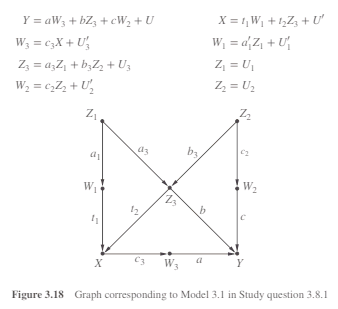
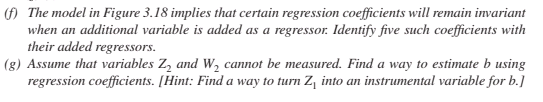

**(f)** I don't quite understand what this question is asking.

**(g)** Regress $Z_3$ against $Z_1$ to estimate $a_3$. Then regress $Y$ against $Z1$ to estimate the total effect $a_3\cdot b$. Then estimate $b=(a_3\cdot b)/a_3$

In [19]:
# (g) check
total_effect = regress(["Z1"], "Y", sample=sample)[0]
a3_estimate = regress(["Z1"], "Z3", sample=sample)[0]
print("The following two numbers should be close to each other:")
print(total_effect / a3_estimate, b)

The following two numbers should be close to each other:
0.3971304725882561 0.38585625572647353


<ipython-input-4-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]
